# Análise exploratória de um dataset sobre viagens de Uber em um determinado Mês

-importar bilbiotecas
-importar os dados
-limpar os dados
-explorar os dados

os dados foram importados a partir de um conjunto de dados localizados na internet

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

para importar os dados; copiar o caminho completo e adicionar "r" antes do caminho

In [121]:
uber_df = pd.read_csv(r"C:\Users\psous\Documents\anaconda\Python-Projects-Uber-Trips-Analysis\Data\uber-raw-data-sep14.csv")

In [122]:
#verificar a estrutura dos dados
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [123]:
uber_df.shape

(1028136, 4)

In [124]:
print(uber_df.describe())  # Estatísticas das colunas numéricas


                Lat           Lon
count  1.028136e+06  1.028136e+06
mean   4.073922e+01 -7.397182e+01
std    4.082861e-02  5.831413e-02
min    3.998970e+01 -7.477360e+01
25%    4.072040e+01 -7.399620e+01
50%    4.074180e+01 -7.398310e+01
75%    4.076120e+01 -7.396280e+01
max    4.134760e+01 -7.271630e+01


In [125]:
print(uber_df.columns)  # Nome das colunas

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')


In [126]:
print(uber_df.isnull().sum())  # Conta os valores nulos por coluna


Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [127]:
#Opções para tratar valores ausentes
#Remover linhas com valores nulos:
#df = df.dropna()

#Preencher valores nulos com um valor específico:
#df.fillna({"coluna1": "valor_padrao", "coluna2": 0}, inplace=True

#Preencher com a média, mediana ou moda:

#df["coluna_numerica"].fillna(df["coluna_numerica"].mean(), inplace=True)  # Média
#df["coluna_numerica"].fillna(df["coluna_numerica"].median(), inplace=True)  # Mediana
#df["coluna_categorica"].fillna(df["coluna_categorica"].mode()[0], inplace=True)  # Moda

In [128]:
#Remover Duplicatas
#Verifique e remova registros duplicados:

#print(df.duplicated().sum())  # Conta as linhas duplicadas
#df = df.drop_duplicates()

In [129]:
print(uber_df.duplicated().sum())

24037


por se tratar de viagens de uber, pode ser que os valores duplicados nao sejam necessarimaente dados que foram contabilizados de forma equivocada.

In [130]:
#fazer uma conferencia geral dos dados
uber_df.head()


,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [131]:
uber_df.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


separar a coluna date/time por dia mes ano e por tempo
adicionar novas colunas de tempo ao dataset de dia, hora, mes, ano

In [132]:
uber_df["Date/Time"] = pd.to_datetime(uber_df["Date/Time"], format="%m/%d/%Y %H:%M:%S")
uber_df["Dia"] = uber_df["Date/Time"].dt.day
uber_df["Mês"] = uber_df["Date/Time"].dt.month
uber_df["Ano"] = uber_df["Date/Time"].dt.year
uber_df["Hora"] = uber_df["Date/Time"].dt.hour
uber_df["Minuto"] = uber_df["Date/Time"].dt.minute

In [133]:
uber_df.head()


,Date/Time,Lat,Lon,Base,Dia,Mês,Ano,Hora,Minuto
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,9,2014,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,9,2014,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,9,2014,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,9,2014,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,9,2014,0,11


In [134]:
uber_df.tail()

,Date/Time,Lat,Lon,Base,Dia,Mês,Ano,Hora,Minuto
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,9,2014,22,57
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,9,2014,22,57
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,9,2014,22,58
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,9,2014,22,58
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,9,2014,22,58


# Agora que os dados foram modelados, podemos fazer alguns plots e analisar como eles se comportam

Text(0, 0.5, 'Densidade de corridas')

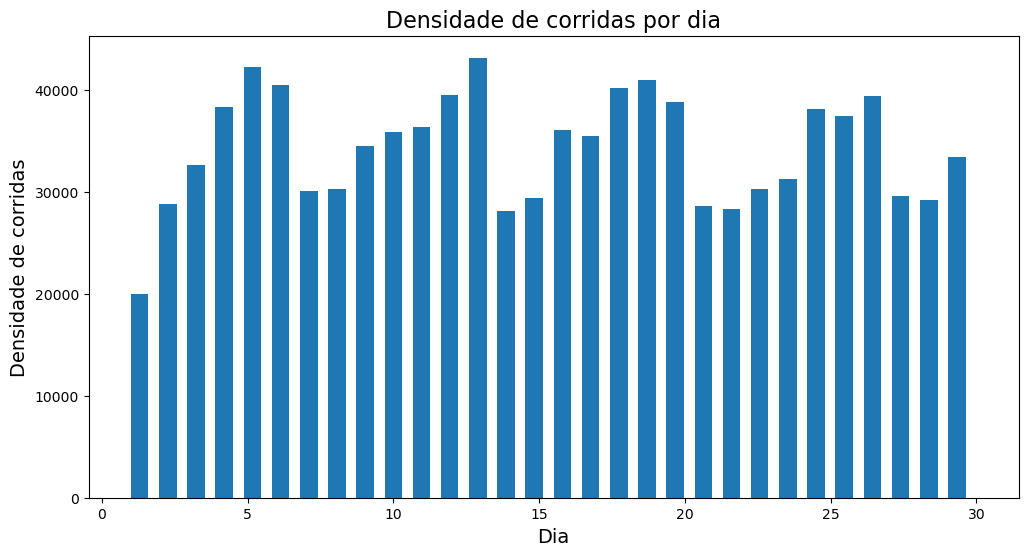

In [135]:
#plotar o grafico por dia
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Dia, width= 0.6, bins= 30)
plt.title("Densidade de corridas por dia", fontsize=16)
plt.xlabel("Dia", fontsize=14)
plt.ylabel("Densidade de corridas", fontsize=14)

Text(0, 0.5, 'Densidade de corridas')

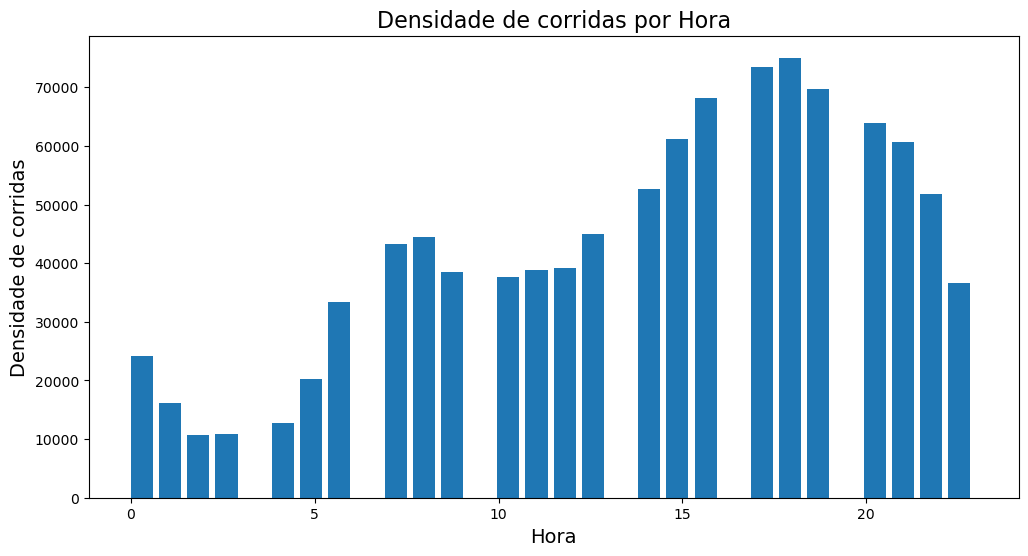

In [136]:
#plotar o grafico por hora
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber_df.Hora, width= 0.6, bins= 30)
plt.title("Densidade de corridas por Hora", fontsize=16)
plt.xlabel("Hora", fontsize=14)
plt.ylabel("Densidade de corridas", fontsize=14)

há de se perceber que o período da noite é onde se concentram mais corridas
visualizaremos agora as corridas por localização


Text(0, 0.5, 'Densidade de corridas')

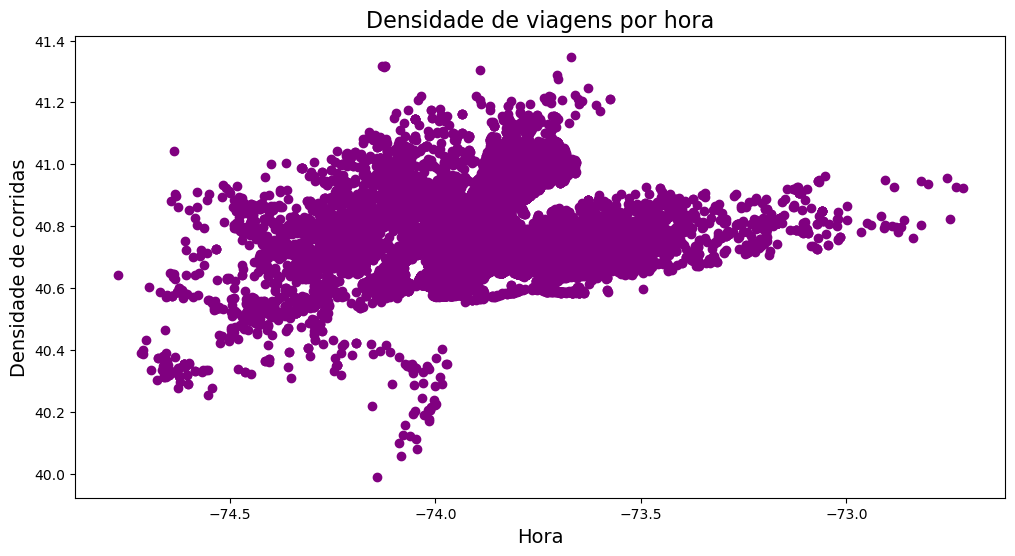

In [137]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (12,6))
x= uber_df.Lon
y= uber_df.Lat
plt.scatter(x, y, color= "purple")
plt.title("Densidade de viagens por hora", fontsize=16)
plt.xlabel("Hora", fontsize=14)
plt.ylabel("Densidade de corridas", fontsize=14)

A regiao com maior densidade de corridas é perto de Manhanttan e Newburgh. Enquanto a região com menor densidade é perto de Nova Jersey

A análise não se atentará aos dados de longitude e latitude por se tratar de dados e bibliotecas que ainda possuo pouco conhecimento.

In [138]:
# Filtrar as corridas para o dia 10/09/2014"
#uber_day10 = uber_df[(uber_df["Date/Time"].uber_df.Dia == 10) & (uber_df["Date/Time"].uber_df.Mês == 9) & (uber_df["Date/Time"].dt.Ano == 2014)]"
uber_day10 = uber_df[(uber_df["Dia"] == 10) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]

#uber_day10 = df[(df["Date/Time"].dt.day == 10) & (df["Date/Time"].dt.month == 9) & (df["Date/Time"].dt.year == 2014)]


# Contar o número de corridas por hora
trips_per_hour_day10 = uber_day10.groupby("Hora").size()

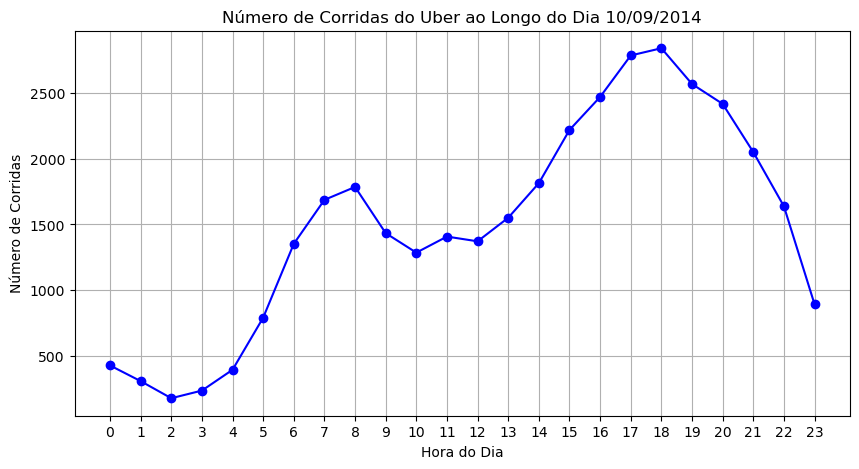

In [89]:
# Criar o gráfico de série temporal
plt.figure(figsize=(10,5))
plt.plot(trips_per_hour_day10.index, trips_per_hour_day10.values, marker='o', linestyle='-', color='b')

# Adicionar rótulos e título
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Corridas")
plt.title("Número de Corridas do Uber ao Longo do Dia 10/09/2014")
plt.xticks(range(0, 24))  # Marcar todas as horas no eixo X
plt.grid()

# Exibir o gráfico
plt.show()

ao selecionar um dia aletorio do mês, é plotado um gráfico em série temporal, e verifica-se a tendencia do aumento do numero de corridas a partir do final da tarde e do começo da noite.

comparar o dia 1 e o dia 30

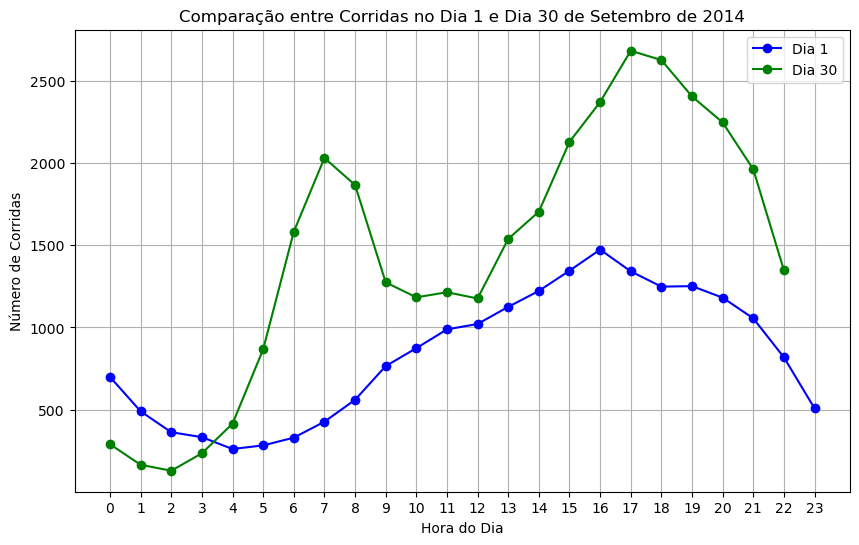

In [100]:
# Criar o gráfico de comparação
plt.figure(figsize=(10, 6))

# Plotar para o dia 1
plt.plot(trips_per_hour_day1.index, trips_per_hour_day1.values, label="Dia 1", marker='o', linestyle='-', color='blue')

# Plotar para o dia 30
plt.plot(trips_per_hour_day30.index, trips_per_hour_day30.values, label="Dia 30", marker='o', linestyle='-', color='green')

# Adicionar rótulos e título
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Corridas")
plt.title("Comparação entre Corridas no Dia 1 e Dia 30 de Setembro de 2014")
plt.xticks(range(0, 24))  # Marcar todas as horas no eixo X
plt.legend()

# Exibir o gráfico
plt.grid()
plt.show()

A curva de ambos os dias se mantem semelhante, apesar de notar um volume maior nas corridas do dia 30 de novembro.
O calendário do dia 01.11.2014 evidencia que é um sábado, enquanto o dia 30.11.2014, um domingo.
Vamos testar a oscilação das corridas em um dia de semana, pode ser segunda feira

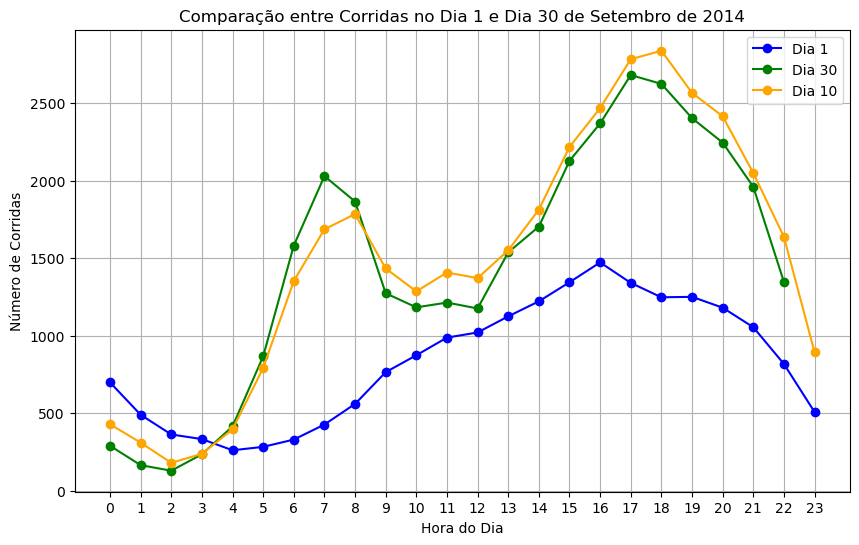

In [102]:
# Criar o gráfico de comparação
plt.figure(figsize=(10, 6))

# Plotar para o dia 1
plt.plot(trips_per_hour_day1.index, trips_per_hour_day1.values, label="Dia 1", marker='o', linestyle='-', color='blue')

# Plotar para o dia 30
plt.plot(trips_per_hour_day30.index, trips_per_hour_day30.values, label="Dia 30", marker='o', linestyle='-', color='green')

# Plotar para o dia 10 (segunda feira)

plt.plot(trips_per_hour_day10.index, trips_per_hour_day10.values, label="Dia 10", marker='o', linestyle='-', color='orange')


# Adicionar rótulos e título
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Corridas")
plt.title("Comparação entre Corridas no Dia 1 e Dia 30 de Setembro de 2014")
plt.xticks(range(0, 24))  # Marcar todas as horas no eixo X
plt.legend()

# Exibir o gráfico
plt.grid()
plt.show()

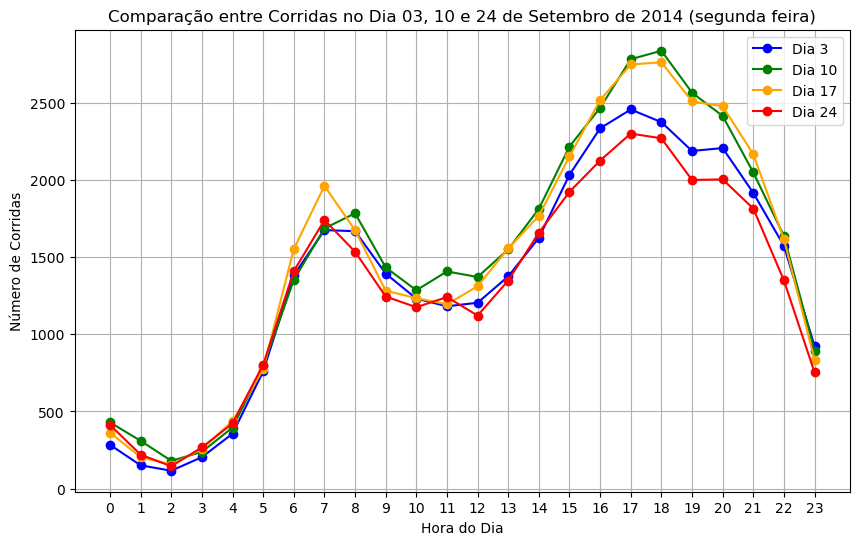

In [115]:
#vamos testar a oscilação das corridas para os mesmos dias da semana do mes, pode ser segunda feira

uber_day3 = uber_df[(uber_df["Dia"] == 3) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]
uber_day10 = uber_df[(uber_df["Dia"] == 10) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]
uber_day17 = uber_df[(uber_df["Dia"] == 17) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]
uber_day24 = uber_df[(uber_df["Dia"] == 24) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]

# Contar o número de corridas por hora
trips_per_hour_day3 = uber_day3.groupby("Hora").size()
trips_per_hour_day10 = uber_day10.groupby("Hora").size()
trips_per_hour_day17 = uber_day17.groupby("Hora").size()
trips_per_hour_day24 = uber_day24.groupby("Hora").size()


# Criar o gráfico de comparação
plt.figure(figsize=(10, 6))

# Plotar para o dia 03
plt.plot(trips_per_hour_day3.index, trips_per_hour_day3.values, label="Dia 3", marker='o', linestyle='-', color='blue')

# Plotar para o dia 10
plt.plot(trips_per_hour_day10.index, trips_per_hour_day10.values, label="Dia 10", marker='o', linestyle='-', color='green')

# Plotar para o dia 17 (segunda feira)

plt.plot(trips_per_hour_day17.index, trips_per_hour_day17.values, label="Dia 17", marker='o', linestyle='-', color='orange')

# Plotar para o dia 24 (segunda feira)

plt.plot(trips_per_hour_day24.index, trips_per_hour_day24.values, label="Dia 24", marker='o', linestyle='-', color='red')


# Adicionar rótulos e título
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Corridas")
plt.title("Comparação entre Corridas no Dia 03, 10 e 24 de Setembro de 2014 (segunda feira)")
plt.xticks(range(0, 24))  # Marcar todas as horas no eixo X
plt.legend()

# Exibir o gráfico
plt.grid()
plt.show()

Percebe-se o mesmo comportamento do gráfico, cabe uma futura análise de correlação entre as corridas no mesmo dia da semana

In [112]:
#vamos testar agora durante a sexta feira (07.11; 14.11;21.11;28.11)

uber_day7 = uber_df[(uber_df["Dia"] == 7) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]
uber_day14 = uber_df[(uber_df["Dia"] == 14) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]
uber_day21 = uber_df[(uber_df["Dia"] == 21) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]
uber_day28 = uber_df[(uber_df["Dia"] == 28) & (uber_df["Mês"] == 9) & (uber_df["Ano"] == 2014)]

# Contar o número de corridas por hora
trips_per_hour_day7 = uber_day7.groupby("Hora").size()
trips_per_hour_day14 = uber_day14.groupby("Hora").size()
trips_per_hour_day21 = uber_day21.groupby("Hora").size()
trips_per_hour_day28 = uber_day28.groupby("Hora").size()

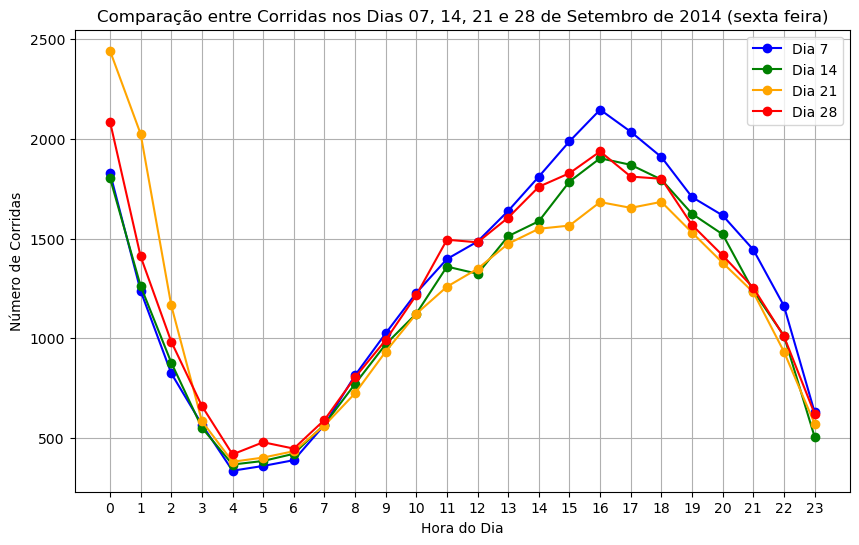

In [116]:

# Criar o gráfico de série temporal
#plt.figure(figsize=(10,5))
#plt.plot(trips_per_hour_day10.index, trips_per_hour_day10.values, marker='o', linestyle='-', color='b')

# Criar o gráfico de comparação
plt.figure(figsize=(10, 6))

# Plotar para o dia 07
plt.plot(trips_per_hour_day7.index, trips_per_hour_day7.values, label="Dia 7", marker='o', linestyle='-', color='blue')

# Plotar para o dia 14
plt.plot(trips_per_hour_day14.index, trips_per_hour_day14.values, label="Dia 14", marker='o', linestyle='-', color='green')

# Plotar para o dia 21 (segunda feira)

plt.plot(trips_per_hour_day21.index, trips_per_hour_day21.values, label="Dia 21", marker='o', linestyle='-', color='orange')

# Plotar para o dia 28 (segunda feira)

plt.plot(trips_per_hour_day28.index, trips_per_hour_day28.values, label="Dia 28", marker='o', linestyle='-', color='red')


# Adicionar rótulos e título
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Corridas")
plt.title("Comparação entre Corridas nos Dias 07, 14, 21 e 28 de Setembro de 2014 (sexta feira)")
plt.xticks(range(0, 24))  # Marcar todas as horas no eixo X
plt.legend()

# Exibir o gráfico
plt.grid()
plt.show()

Com a mudança do dia da semana, percebe-se uma ligeira diferença no comportamento das corridas, um alto volume durante a madrugada, e um aumento de pedidos ao longo do dia, início da tarde, e da noite

Podemos fazer uma comparação com o gráfico da média das segundas feiras, e com a média das sextas feiras
